## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns

In [7]:
tn = pd.read_excel("titanic.xlsx")

### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [8]:
tn.shape

(1309, 14)

In [9]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [10]:
tn.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [33]:
# There are seven out of fourteen columns having missing data

# age, fare, cabin, embarked, boat, body and home.dest have missing data

# body has the most missing data of 1188

# fare has lease missing data of 1 

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [11]:
# Remove the columns with excessive missing data (any column missing greater than 500 rows)
# cabin, boat, body and home.dest have missing data more than 500

tn.drop(columns = ["cabin", "boat", "body", "home.dest"], inplace = True)


In [12]:
tn.shape

(1309, 10)

In [13]:
tn["embarked"]. value_counts()


S    914
C    270
Q    123
Name: embarked, dtype: int64

In [14]:
#When there is very little missing data, we can make replacements. 
#Replace the missing data for the "embarked" column with the most common embarkation point.

tn["embarked"].fillna("S", inplace = True)

In [15]:
tn["embarked"].isnull().sum()

0

In [ ]:
# Replace the missing data in "fare" with the average fare of the entire sample.

In [16]:
tn["fare"].isnull().sum()

1

In [17]:
f_mean = round(tn["fare"].mean(), 2)
print(f_mean)

33.3


In [18]:
tn["fare"].fillna(f_mean, inplace = True)

In [19]:
tn["fare"].isnull().sum()

0

In [ ]:
# Remove the rows in the dataset that has missing "age" data.

In [20]:
tn["age"].isnull().sum()

263

In [21]:
tn.shape

(1309, 10)

In [22]:
tn.dropna(subset = ["age"], inplace = True)
tn.shape

(1046, 10)

In [23]:
tn.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

# Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)

In [24]:
#pclass = passenger class; 1 = first class, 2 = second class, 3 = third class

tn["pclass"].replace([1, 2, 3], ["first class", "second class", "third class"], inplace = True)
tn["pclass"].value_counts()


third class     501
first class     284
second class    261
Name: pclass, dtype: int64

In [25]:
#survived = passenger survival; 1 = survived, 0 = did not survive

tn["survived"].replace([1, 0], ["survived", "did not survive"], inplace = True)
tn["survived"].value_counts()

did not survive    619
survived           427
Name: survived, dtype: int64

In [26]:
#embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

tn["embarked"].replace(["C", "Q", "S"], ["Cherbourg", "Queenstown", "Southamtom"], inplace = True)
tn["embarked"].value_counts()

Southamtom    784
Cherbourg     212
Queenstown     50
Name: embarked, dtype: int64

Create a new column called "Titanic Passenger" and make all values 1

In [27]:
tn["Titanic Passenger"] = 1
tn["Titanic Passenger"].value_counts()

1    1046
Name: Titanic Passenger, dtype: int64

Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with

In [28]:
tn["Family Size"] = tn["sibsp"] + tn["parch"] + 1

tn["Family Size"].value_counts()


1     590
2     206
3     144
4      39
6      25
5      17
7      16
8       8
11      1
Name: Family Size, dtype: int64

Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family.

In [29]:
tn["Travel Alone"] = 0

tn.loc[tn["Family Size"] == 1, "Travel Alone"] = 1

tn["Travel Alone"].value_counts()

1    590
0    456
Name: Travel Alone, dtype: int64

Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 

In [30]:
tn["Has Caregiver"] = 0

tn.loc[((tn["age"] < 13) & (tn["Family Size"] > 1)), "Has Caregiver"] = 1

tn["Has Caregiver"].value_counts()

0    955
1     91
Name: Has Caregiver, dtype: int64

Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise.

13.0000    58
26.0000    48
8.0500     38
10.5000    35
7.8958     30
           ..
26.3875     1
7.6292      1
31.6792     1
7.8208      1
7.8750      1
Name: fare, Length: 257, dtype: int64

In [31]:
tn["crew"] = 0

tn.loc[tn["fare"] == 0, "crew"] = 1
        
tn["crew"].value_counts()

0    1038
1       8
Name: crew, dtype: int64

Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 

In [32]:
bins = [0, 1, 13, 19, 60, 150]

bin_labels = ["infant", "child", "teen", "adult", "senior"]

tn["Age Group"] = pd.cut(tn["age"], bins, labels = bin_labels)

tn["Age Group"].value_counts()

adult     788
teen      126
child      77
senior     33
infant     22
Name: Age Group, dtype: int64

### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [33]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1046 non-null   object  
 1   survived           1046 non-null   object  
 2   name               1046 non-null   object  
 3   sex                1046 non-null   object  
 4   age                1046 non-null   float64 
 5   sibsp              1046 non-null   int64   
 6   parch              1046 non-null   int64   
 7   ticket             1046 non-null   object  
 8   fare               1046 non-null   float64 
 9   embarked           1046 non-null   object  
 10  Titanic Passenger  1046 non-null   int64   
 11  Family Size        1046 non-null   int64   
 12  Travel Alone       1046 non-null   int64   
 13  Has Caregiver      1046 non-null   int64   
 14  crew               1046 non-null   int64   
 15  Age Group          1046 non-null   category
dtypes: cat

In [34]:
tn["pclass"].value_counts()

third class     501
first class     284
second class    261
Name: pclass, dtype: int64

In [35]:
tn["survived"].value_counts()

did not survive    619
survived           427
Name: survived, dtype: int64

In [36]:
tn["sex"].value_counts()

male      658
female    388
Name: sex, dtype: int64

In [37]:
tn["embarked"].value_counts()

Southamtom    784
Cherbourg     212
Queenstown     50
Name: embarked, dtype: int64

In [38]:
tn["Titanic Passenger"].value_counts()

1    1046
Name: Titanic Passenger, dtype: int64

In [39]:
tn["Travel Alone"].value_counts()

1    590
0    456
Name: Travel Alone, dtype: int64

In [41]:
tn["Travel Alone"].value_counts()

1    590
0    456
Name: Travel Alone, dtype: int64

In [42]:
tn["Has Caregiver"].value_counts()

0    955
1     91
Name: Has Caregiver, dtype: int64

In [43]:
tn["crew"].value_counts()

0    1038
1       8
Name: crew, dtype: int64

In [44]:
tn["Age Group"].value_counts()

adult     788
teen      126
child      77
senior     33
infant     22
Name: Age Group, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [45]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1046 non-null   object  
 1   survived           1046 non-null   object  
 2   name               1046 non-null   object  
 3   sex                1046 non-null   object  
 4   age                1046 non-null   float64 
 5   sibsp              1046 non-null   int64   
 6   parch              1046 non-null   int64   
 7   ticket             1046 non-null   object  
 8   fare               1046 non-null   float64 
 9   embarked           1046 non-null   object  
 10  Titanic Passenger  1046 non-null   int64   
 11  Family Size        1046 non-null   int64   
 12  Travel Alone       1046 non-null   int64   
 13  Has Caregiver      1046 non-null   int64   
 14  crew               1046 non-null   int64   
 15  Age Group          1046 non-null   category
dtypes: cat

In [46]:
print("Variable: Age")

print("Mean: ", tn["age"].mean())
print("Median: ", tn["age"].median())
print("Mode: ", tn["age"].mode())
print("Standard Deviation: ", tn["age"].std())
print("Range: ", tn["age"].max() - tn["age"].min())

Variable: Age
Mean:  29.8811345124283
Median:  28.0
Mode:  0    24.0
dtype: float64
Standard Deviation:  14.413499699923594
Range:  79.8333


In [47]:
print("Variable: sibsp")

print("Mean: ", tn["sibsp"].mean())
print("Median: ", tn["sibsp"].median())
print("Mode: ", tn["sibsp"].mode())
print("Standard Deviation: ", tn["sibsp"].std())
print("Range: ", tn["sibsp"].max() - tn["sibsp"].min())

Variable: sibsp
Mean:  0.502868068833652
Median:  0.0
Mode:  0    0
dtype: int64
Standard Deviation:  0.912167299664662
Range:  8


In [48]:
print("Variable: parch")

print("Mean: ", tn["parch"].mean())
print("Median: ", tn["parch"].median())
print("Mode: ", tn["parch"].mode())
print("Standard Deviation: ", tn["parch"].std())
print("Range: ", tn["parch"].max() - tn["parch"].min())

Variable: parch
Mean:  0.42065009560229444
Median:  0.0
Mode:  0    0
dtype: int64
Standard Deviation:  0.8397504516166859
Range:  6


In [49]:
print("Variable: fare")

print("Mean: ", tn["fare"].mean())
print("Median: ", tn["fare"].median())
print("Mode: ", tn["fare"].mode())
print("Standard Deviation: ", tn["fare"].std())
print("Range: ", tn["fare"].max() - tn["fare"].min())

Variable: fare
Mean:  36.682843116634935
Median:  15.8
Mode:  0    13.0
dtype: float64
Standard Deviation:  55.70595890061332
Range:  512.3292


In [50]:
print("Variable: Family Size")

print("Mean: ", tn["Family Size"].mean())
print("Median: ", tn["Family Size"].median())
print("Mode: ", tn["Family Size"].mode())
print("Standard Deviation: ", tn["Family Size"].std())
print("Range: ", tn["Family Size"].max() - tn["Family Size"].min())

Variable: Family Size
Mean:  1.9235181644359465
Median:  1.0
Mode:  0    1
dtype: int64
Standard Deviation:  1.4528906850592564
Range:  10


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [51]:
#pclass
#pclass: how many survivors are in each passenger class? does a pattern emerge?
#which class has the most survivors? which has the least?

pd.crosstab(tn["pclass"], tn["survived"], margins = True)

survived,did not survive,survived,All
pclass,,,
first class,103,181,284
second class,146,115,261
third class,370,131,501
All,619,427,1046


In [52]:
# sex: how many survivors are in each variable group? does a pattern emerge?
#which group has the most survivors? which has the least?

In [53]:
pd.crosstab(tn["sex"], tn["survived"], margins = True)

survived,did not survive,survived,All
sex,,,
female,96,292,388
male,523,135,658
All,619,427,1046


In [54]:
# age: how does the average age of the passenger differ based on survival group

In [55]:
tn["age"].groupby(tn["survived"]).mean()

survived
did not survive    30.545369
survived           28.918228
Name: age, dtype: float64

In [56]:
# The average age of the passenger who survived and did not survive differ from about 1.5 years.

In [57]:
# age group: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?

In [58]:
pd.crosstab(tn["Age Group"], tn["survived"], margins = True)

survived,did not survive,survived,All
Age Group,,,
infant,5,17,22
child,37,40,77
teen,77,49,126
adult,475,313,788
senior,25,8,33
All,619,427,1046


Among the 427 survivors the most survivors were from the adult group (313). In contrast, least survivor were from senior group (8)

In [59]:
#family size: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?

In [60]:
pd.crosstab(tn["Family Size"], tn["survived"], margins = True)

survived,did not survive,survived,All
Family Size,,,
1,402,188,590
2,93,113,206
3,63,81,144
4,9,30,39
5,11,6,17
6,20,5,25
7,12,4,16
8,8,0,8
11,1,0,1


Among the total survivor the most survived were from the passenger who travelled alone(188), followed by passenger with family size  2 , 3 and 4. There were no survivors with family size 8 and 11.

In [61]:
# travel alone: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?

In [62]:
pd.crosstab(tn["Travel Alone"], tn["survived"], margins = True)

survived,did not survive,survived,All
Travel Alone,,,
0,217,239,456
1,402,188,590
All,619,427,1046


Out of 427 survivors, 188 were traveling alone and 239 were travelling with family.

In [ ]:
#crew: how many survivors are in each variable group? does a pattern emerge? 
#which group has the most survivors? which has the least?

In [63]:
pd.crosstab(tn["crew"], tn["survived"], margins = True)

survived,did not survive,survived,All
crew,,,
0,613,425,1038
1,6,2,8
All,619,427,1046


Among the 8 crew members only 2 of them were able to survive the accident.

In [64]:
#has caregiver: how many survivors are in each variable group? does a pattern emerge?
#which group has the most survivors? which has the least?

In [65]:
pd.crosstab(tn["Has Caregiver"], tn["survived"], margins = True)

survived,did not survive,survived,All
Has Caregiver,,,
0,580,375,955
1,39,52,91
All,619,427,1046


Among the total survivor most of them did not have caregivers (375).

In [66]:
#fare: how does the average fare the passenger paid differ based on survival group?

In [67]:
tn["fare"].groupby(tn["survived"]).mean()

survived
did not survive    25.161920
survived           53.384134
Name: fare, dtype: float64

The mean fare of the survivers was $ 53.3, whereas the mean fare for the passenger who did not survive was $ 25.1. The average fare differed by $ 28.  

In [68]:
# embarked: how many survivors are in each variable group? does a pattern emerge?
#which group has the most survivors? which has the least?

In [69]:
pd.crosstab(tn["embarked"], tn["survived"], margins = True)

survived,did not survive,survived,All
embarked,,,
Cherbourg,80,132,212
Queenstown,37,13,50
Southamtom,502,282,784
All,619,427,1046


Most of the passengers embarked from Southamtom (784). Among the total survivors most of them embarked from Southamtom(282) and Cherbourg (132).

### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

In [70]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1046 non-null   object  
 1   survived           1046 non-null   object  
 2   name               1046 non-null   object  
 3   sex                1046 non-null   object  
 4   age                1046 non-null   float64 
 5   sibsp              1046 non-null   int64   
 6   parch              1046 non-null   int64   
 7   ticket             1046 non-null   object  
 8   fare               1046 non-null   float64 
 9   embarked           1046 non-null   object  
 10  Titanic Passenger  1046 non-null   int64   
 11  Family Size        1046 non-null   int64   
 12  Travel Alone       1046 non-null   int64   
 13  Has Caregiver      1046 non-null   int64   
 14  crew               1046 non-null   int64   
 15  Age Group          1046 non-null   category
dtypes: cat

Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 

Text(0.5, 1.0, 'Age distribution of all the passengers in Titanic')

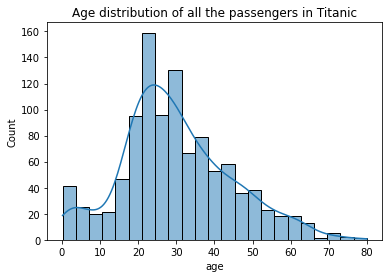

In [71]:
sns.histplot(tn["age"], kde = True)

plt.title("Age distribution of all the passengers in Titanic")



In [72]:
tn["survived"].value_counts()

did not survive    619
survived           427
Name: survived, dtype: int64

In [73]:
# embarged and survival



Text(0.5, 1.0, 'Passengers who survived according to their age group')

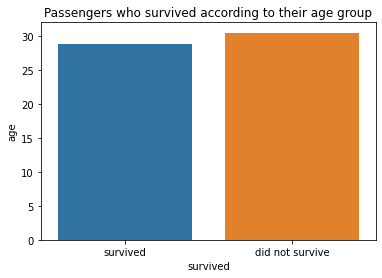

In [74]:
# Age group and survived

sns.barplot(data = tn, x = "survived", y = "age", ci = None)

plt.title("Passengers who survived according to their age group")

Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?

<AxesSubplot:xlabel='pclass', ylabel='age'>

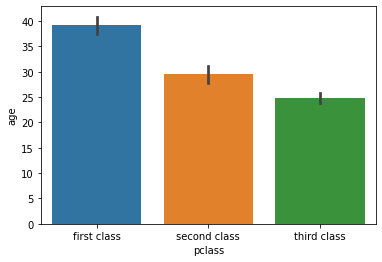

In [75]:
sns.barplot(x = tn["pclass"], y = tn["age"])

Create a violin plot to show the distribution of age across passenger class. 

<AxesSubplot:xlabel='pclass', ylabel='age'>

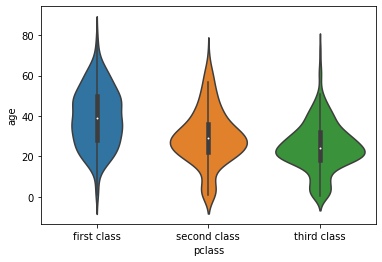

In [76]:
sns.violinplot(x = tn["pclass"], y = tn["age"])